In [17]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Project for DATA 11800 Section 1- Autumn 2023 (due November 10)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  Clarity and soundness of the arguments and conclusions; 
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.

For this project, you are tasked to use the [National Crime Victimization Survey (NCVS)](https://www.icpsr.umich.edu/web/NACJD/studies/38090/summary). The NCVS gathers data about personal and household crimes since 1973. The primary goals of the survey are to collect information about the victims, to explore the consequences of crime, and to estimate the number and types of crimes that go unreported.

Information about the study and data can be found [here](https://drive.google.com/file/d/1cftlGhPkRdITPaKTTKgHH75f1GQYy87V/view?usp=sharing)

The goal of this project is to gain insight into crime victimization using the tools you have learned so far in this class.

### The Data 

You can (but are not required to) use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. Some potential options include:

- NCVS Series and Supplements, https://www.icpsr.umich.edu/web/NACJD/series/95
- Annual Survey of Jails 2020, https://www.icpsr.umich.edu/web/NACJD/studies/38408
- National Prisoner Statistics, https://www.icpsr.umich.edu/web/NACJD/studies/38249
- American Community Survey, https://www.census.gov/programs-surveys/acs/

There is a plethoral of data collected in the NCVS, we have cleaned and selected a portion of the data for your use in this project. That data is provided on Canvas (the `NCVS_2020.csv` file). Also provided on Canvas is a codebook (an Excel file containing information about each variable) created by your instructors as well as a codebook from the study itself giving additional information about the data and data collection methods that will be useful to answer some of the questions below. The preprocessed data provided has 8044 rows (first row is the name of the columns, and there are 8043 rows of data) and 81 columns. 

In [18]:
# read the data - make sure you specify the proper path to the file
proj_df=pd.read_csv('NCVS_2020.csv')
proj_df.shape

(8043, 81)

In [4]:
# a sample of 10 rows
proj_df.sample(10)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
6748,2020.4,1.850000e+24,9,65,2,1,1,9,2,2,...,9,9,9,9,99,9,9,9,0,1
3926,2020.2,1.890000e+24,3,45,1,1,1,9,2,2,...,1,1,9,9,27,1,1,2,4,1
4361,2020.3,1.710000e+24,6,22,1,1,6,2,2,1,...,1,1,9,9,23,1,1,2,4,3
7723,2020.4,1.960000e+24,2,47,2,1,1,9,2,2,...,1,1,9,9,27,1,1,2,4,2
6055,2020.4,1.710000e+24,5,53,2,1,5,1,2,2,...,1,1,9,9,27,1,1,2,4,1
7445,2020.4,1.930000e+24,4,47,2,1,1,9,2,2,...,1,2,1,1,4,1,1,2,4,1
5296,2020.3,1.890000e+24,11,34,3,1,1,9,2,2,...,1,2,2,9,99,9,9,9,4,1
4337,2020.3,1.710000e+24,12,33,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,4,2
6516,2020.4,1.810000e+24,4,45,2,1,2,1,2,2,...,1,2,2,9,99,9,9,9,4,1
4259,2020.3,1.710000e+24,5,32,2,1,1,9,2,2,...,1,1,9,9,23,1,1,2,4,1


### The Assignment

#### Report on your findings about victimization. 
Imagine you are serving as a consultant who wants to recommend directions for future research, propose modifications in public policy, or suggest how one can reduce victimization and its consequences.

You must submit two files: 

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A report of your findings **(in a .pdf file). This report should be at most 4 pages long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses and plots you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Describe the data. Where does it come from? Why was it collected (what are the researchers interested in studying)? Was it an experiment? A retrospective observational study? A prospective observational study? Describe the sampling process. How many variables are there? List a few. How many observations (i.e., rows)? How many distinct households? Using what you have learned about data collection, is this a biased or unbiased sample? Why?

B.  **Characteristics of sample**. Describe the sample of people and households in the dataset.  Summarize the distributions of 3 or more of the characteristics (variables) of the people and households.  Some interesting variables you may consider include: marital status, employment, age, income etc. Choose at least 1 categorical and 1 numerical variable. You should include a graph or table for each distribution. You should create at least one graph and at least one table.

C. **Relationships between variables.**  Now, shift focus from distributions of single variables to relationships between variables. You should investigate at least 2 of the individual or household characteristics (race, sex, education...) and at least two of the crime related variables.  For example, do you find evidence that those with levels of education are victims of less crime? Include two or more graphs or tables here. Describe any associations you find. 

D. **Provide context**  To the best of your knowledge, what do the relationships you discovered imply? Do you think the associations are causal? What are some potential confounders that may explain the relationships?  What are some questions that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

E. **Conclusion/Self-Assessment** What did you learn from exploring this dataset?

Your submission is to be uploaded to Canvas.  
There are some minimum requirements for your submission:

1. Upload your report in PDF format to Canvas. 
2. Upload the Jupyter notebook containing your analysis code to Canvas.
3. The report should be 4 pages maximum, including bibliography, tables and figures.
4. If your report uses outside results and/or data, proper citations must be provided.
    


In [5]:
marriage_distributions=proj_df.groupby(by="MARITAL").count()
marriage_distributions=marriage_distributions.reset_index()
marriage_meanings=pd.DataFrame(
    {'MARITAL':[1,2,3,4,5,8],
     'Marital_Status':['Married','Widowed','Divorced','Separated','Never Married','Residue']}
)
marriage_distributions=pd.merge(marriage_distributions,marriage_meanings)
marriage_distributions=marriage_distributions[['YEARQ','Marital_Status']]
marriage_distributions

,YEARQ,Marital_Status
0,3131,Married
1,475,Widowed
2,1333,Divorced
3,301,Separated
4,2760,Never Married
5,43,Residue


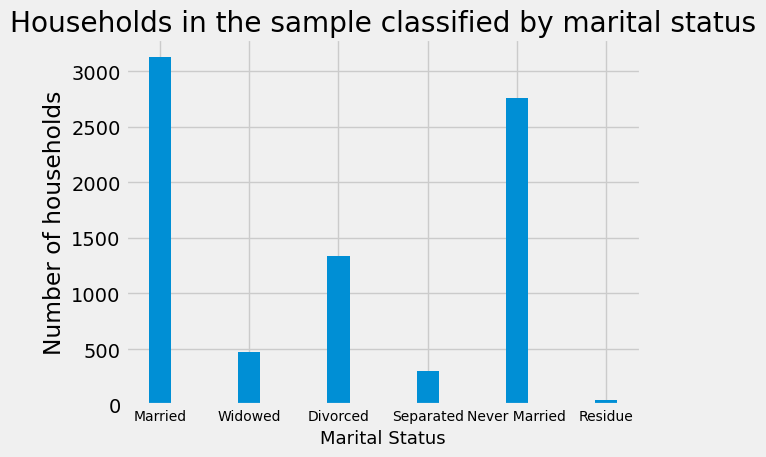

In [6]:
marriage_distributions=marriage_distributions.rename(columns={"YEARQ":"Counts"})
x_values=marriage_distributions.Marital_Status
plt.bar(marriage_distributions.Marital_Status,height=marriage_distributions.Counts,width=0.25)
index=np.arange(6)
# plt.xticks(,marriage_distributions['Marital_Status'])


plt.title("Households in the sample classified by marital status")
plt.ylabel("Number of households")
plt.xlabel("Marital Status",fontsize=13)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

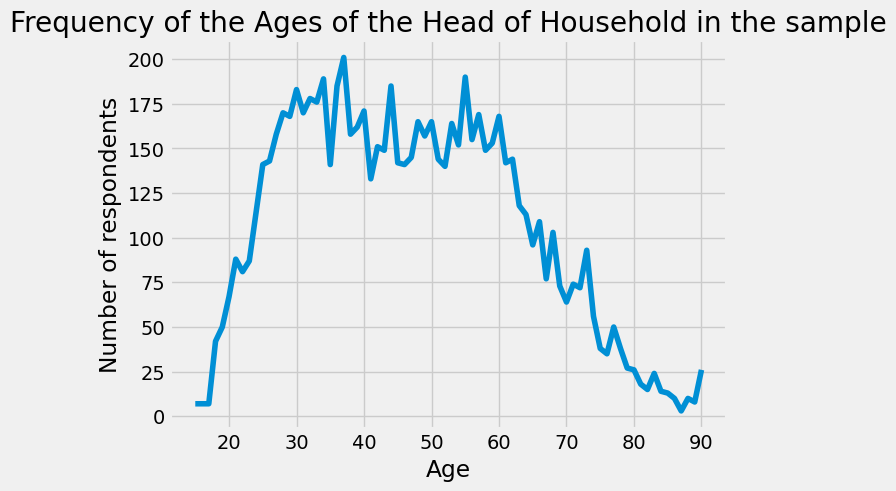

In [7]:
ages=proj_df.groupby(by="PRINCIPAL_AGE").count()
ages=ages.reset_index()
ages=ages[['PRINCIPAL_AGE','YEARQ']]
ages=ages.rename(columns={"YEARQ":"Counts","PRINCIPAL_AGE":"Age"})
plt.plot(ages['Age'],ages['Counts'])
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title("Frequency of the Ages of the Head of Household in the sample")
plt.show()

In [8]:
Urbanicity=proj_df.groupby(by="URBANICITY").count()
Urbanicity=Urbanicity.reset_index()
Urban_definitions=pd.DataFrame(
    {'URBANICITY':[1,2,3],
     'Urban_Key':['Urban','Suburban','Rural']}
)
Urbanicity=pd.merge(Urbanicity,Urban_definitions)
Urbanicity=Urbanicity[['Urban_Key','YEARQ']]
Urbanicity=Urbanicity.rename(columns={"YEARQ":"Counts","Urban_Key":"Type of Area"})
Urbanicity['Percent in Area']=round((Urbanicity.Counts)/(Urbanicity.Counts.sum())*100,1)
display(Urbanicity)


,Type of Area,Counts,Percent in Area
0,Urban,1441,17.9
1,Suburban,5442,67.7
2,Rural,1160,14.4


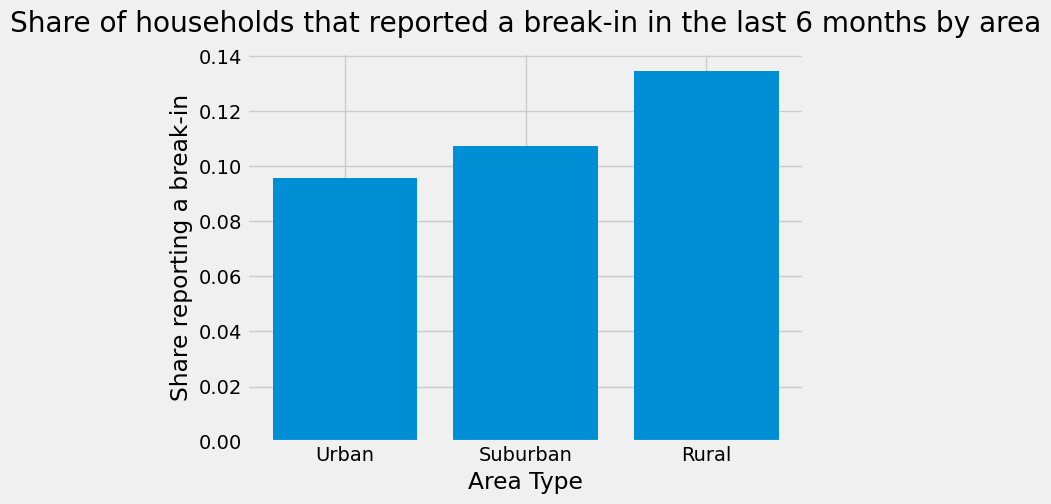

In [9]:
urban_data=proj_df.loc[proj_df.URBANICITY==1]
suburban_data=proj_df.loc[proj_df.URBANICITY==2]
rural_data=proj_df.loc[proj_df.URBANICITY==3]
urban_prop=len(urban_data.loc[urban_data['BROKEN_IN']==1])/len(urban_data)
suburban_prop=len(suburban_data.loc[suburban_data['BROKEN_IN']==1])/len(suburban_data)
rural_prop=len(rural_data.loc[rural_data['BROKEN_IN']==1])/len(rural_data)
urbanity_and_broken=[urban_prop,suburban_prop,rural_prop]
urban_labels=['Urban','Suburban','Rural']
# plt.bar(urbanity_and_broken,height=urbanity_and_broken)
plt.bar(urban_labels,height=urbanity_and_broken)
plt.xlabel("Area Type")
plt.ylabel("Share reporting a break-in")
plt.title("Share of households that reported a break-in in the last 6 months by area",pad=15)
plt.show()


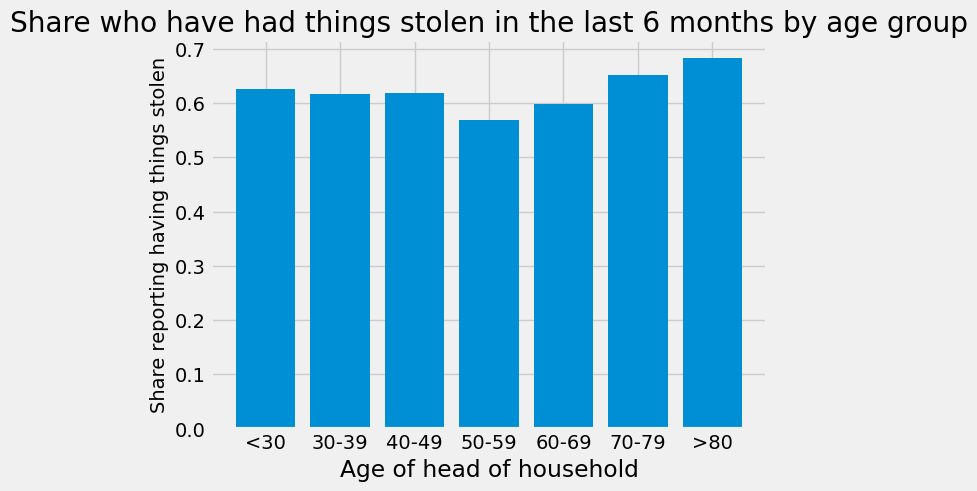

In [47]:
group1=proj_df.loc[proj_df.PRINCIPAL_AGE<30]
group2=proj_df.loc[(proj_df.PRINCIPAL_AGE>=30) & (proj_df.PRINCIPAL_AGE<=39)]
group3=proj_df.loc[(proj_df.PRINCIPAL_AGE>=40) & (proj_df.PRINCIPAL_AGE<=49)]
group4=proj_df.loc[(proj_df.PRINCIPAL_AGE>=50) & (proj_df.PRINCIPAL_AGE<=59)]
group5=proj_df.loc[(proj_df.PRINCIPAL_AGE>=60) & (proj_df.PRINCIPAL_AGE<=69)]
group6=proj_df.loc[(proj_df.PRINCIPAL_AGE>=70) & (proj_df.PRINCIPAL_AGE<=79)]
group7=proj_df.loc[proj_df.PRINCIPAL_AGE>=80]
prop_1=len(group1.loc[group1['STOLEN']==1])/len(group1)
prop_2=len(group2.loc[group2['STOLEN']==1])/len(group2)
prop_3=len(group3.loc[group3['STOLEN']==1])/len(group3)
prop_4=len(group4.loc[group4['STOLEN']==1])/len(group4)
prop_5=len(group5.loc[group5['STOLEN']==1])/len(group5)
prop_6=len(group6.loc[group6['STOLEN']==1])/len(group6)
prop_7=len(group7.loc[group7['STOLEN']==1])/len(group7)
y_values=[prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7]
labels=["<30","30-39","40-49","50-59","60-69","70-79",">80"]
plt.bar(labels,height=y_values)
plt.title("Share who have had things stolen in the last 6 months by age group")
plt.xlabel("Age of head of household")
plt.ylabel("Share reporting having things stolen",fontsize=14)
plt.show()



# plt.scatter[Principal_Age,Vehicles]

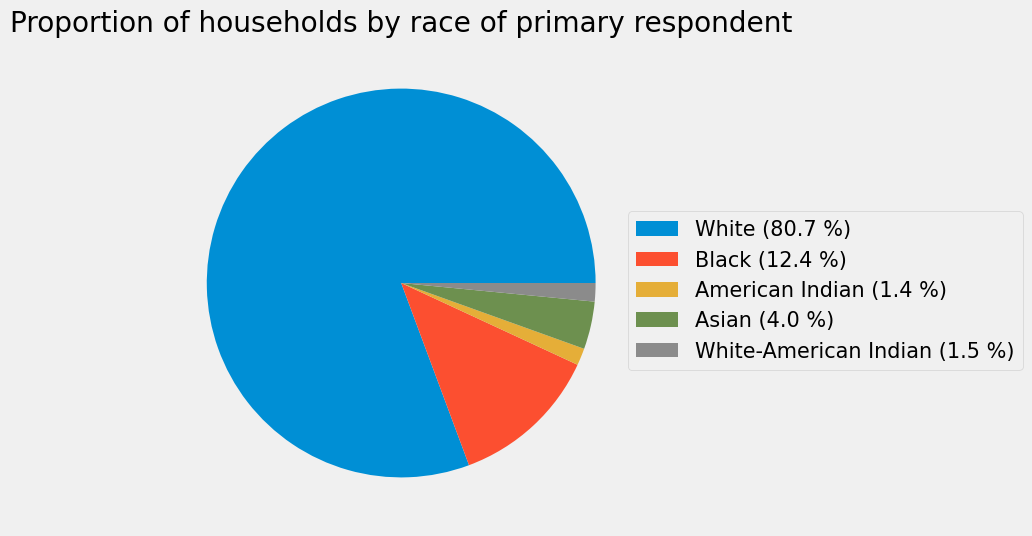

In [11]:
# racial_distributions=proj_df.groupby("PRINCIPAL_RACE").count()
# racial_distributions=racial_distributions['YEARQ']
# racial_meanings=pd.DataFrame(
#     {'YEARQ':[1,2,3,4,7],
#      'Race_Name':['White','Black','American Indian','Asian','White-American Indian']}
# )
# racial_data=pd.merge(
    
racial_distributions=proj_df.groupby("PRINCIPAL_RACE").count()
racial_distributions=racial_distributions.reset_index()
racial_meanings=pd.DataFrame(
    {'PRINCIPAL_RACE':[1,2,3,4,7],
     'Primary_Race':['White','Black','American Indian','Asian','White-American Indian']}
)
racial_distributions=pd.merge(racial_distributions,racial_meanings)
racial_distributions=racial_distributions[['YEARQ','Primary_Race']]
racial_distributions=racial_distributions.rename(columns={"YEARQ":"Counts"})
racial_distributions

# x_values=racial_distributions.Primary_Race
# plt.bar(racial_distributions.Primary_Race,height=racial_distributions.Counts,width=0.25)
# index=np.arange(6)
# plt.xticks(,marriage_distributions['Marital_Status'])


plt.figure(figsize=(10, 6))
patches, text =plt.pie(racial_distributions.Counts)
plt.title("Proportion of households by race of primary respondent",  loc = 'center')
labels = ['White (80.7 %)', 'Black (12.4 %)', 'American Indian (1.4 %)', 'Asian (4.0 %)', 'White-American Indian (1.5 %)']
plt.legend(patches, labels, loc=4, bbox_to_anchor=(1.8, 0.3), fontsize=15)

plt.show()


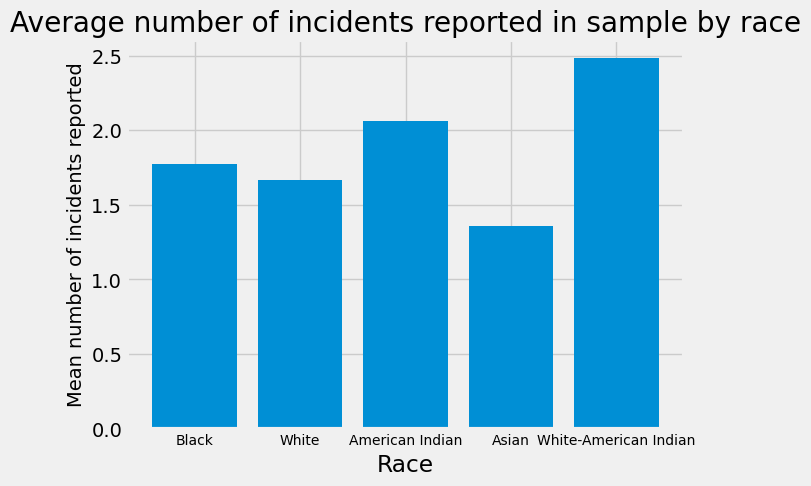

In [46]:
black_threatened=proj_df.loc[proj_df['PRINCIPAL_RACE']==2]
white_threatened=proj_df.loc[proj_df.PRINCIPAL_RACE==1]
american_indian_threatened=proj_df.loc[proj_df.PRINCIPAL_RACE==3]
asian_threatened=proj_df.loc[proj_df.PRINCIPAL_RACE==4]
white_american_indian_threatened=proj_df.loc[proj_df.PRINCIPAL_RACE==7]
black_prop=black_threatened.NUM_REPORT.mean()
white_prop=white_threatened.NUM_REPORT.mean()
american_indian_prop=american_indian_threatened.NUM_REPORT.mean()
asian_prop=asian_threatened.NUM_REPORT.mean()
white_american_indian_prop=white_american_indian_threatened.NUM_REPORT.mean()
y_values=[black_prop,white_prop,american_indian_prop,asian_prop,white_american_indian_prop]
labels=["Black","White","American Indian","Asian","White-American Indian"]
plt.bar(labels,height=y_values)
plt.title("Average number of incidents reported in sample by race")
plt.xlabel("Race")
plt.xticks(fontsize=10)
plt.ylabel("Mean number of incidents reported",fontsize=14)
plt.show()